In [7]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
% matplotlib inline

In [8]:
# location of the constantly updated data from github
data = 'https://raw.githubusercontent.com/triketora/women-in-software-eng/master/data.txt'

In [23]:
# get the data
r = requests.get(data).text
# split it by company name
# each company becomes item in list
r = re.split('\[.*\]', r)

In [34]:
companies = {}
# loop through
for entry in r:
    # grep out data
    if not re.search('^#', entry):
        company = re.search('company:\s*([^\n]+)\n', entry).group(1)
        eng = re.search('num_eng:\s*(\d+)', entry).group(1)
        women = re.search('num_female_eng:\s*(\d+)', entry).group(1)
        
        companies[company] = {'eng': int(eng), 'women': int(women)}

In [38]:
print("This database has " + str(len(companies)) + " companies in it.")

This database has 248 companies in it.


In [44]:
# calculate number females
per_female = [companies[c]['women'] / float(companies[c]['eng']) \
               for c in companies]

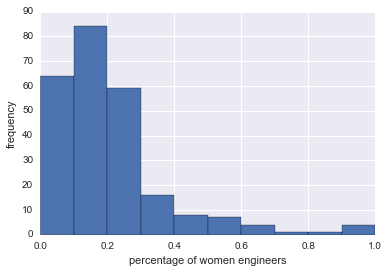

In [42]:
plt.hist(per_female)
plt.xlabel("percentage of women engineers")
plt.ylabel("frequency")